# EXPLORATORY DATA ANALYSIS

In [1]:
#Loading the dataset from the sklearn library
#dataset will now be stored as name 'digits'
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()


In [2]:
#printing the first sample of the dataset
print(digits.data[0])
#So we can see its gives us an array of [1X64]

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [3]:
#Analyzing the shape of the data
print(digits.data.shape)
#So, we have 1797  samples and each sample is represented by 64 attributes

(1797, 64)


In [4]:
# Print the number of unique labels or classes
import numpy as np
number_digits = np.unique(digits.target)
print(number_digits)
#So, we have 10 different classes whose values are ranging from 0-9

[0 1 2 3 4 5 6 7 8 9]


In [5]:
## Isolate the `images`
#Here we are loading the data as images
digits_images = digits.images

In [6]:
# Inspect the shape
print(digits_images.shape)
#So, here we can see each image is represented by 8X8 matrix

(1797, 8, 8)


In [7]:
#Couting each sample corresponding to each label
np.bincount(digits.target)
#here each entry of this array is representing number of samples corresponding to every class represented by index of the array. 
#Means that 178 samples corresponds to class 0 , 182 corresponds to class '1' and so on.

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

In [8]:
#Couting each sample corresponding to each label
print('Class label  ' + 'No.of samples')
for class_name, class_count in zip(digits.target_names, np.bincount(digits.target)):
    print("     ",class_name,"            ",class_count)

Class label  No.of samples
      0              178
      1              182
      2              177
      3              183
      4              181
      5              182
      6              181
      7              179
      8              174
      9              180


#                                    Principal Component Analysis

## 1)Creating Covariance and Correlation matrix

In [9]:
import pandas as pd
X = digits.data
y = digits.target
df = pd.DataFrame(X)

In [10]:
# Creating correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

    0         1         2         3         4         5         6         7   \
0  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  NaN  1.000000  0.556618  0.207814 -0.018761  0.060776  0.048388 -0.038927   
2  NaN  0.556618  1.000000  0.560180 -0.084235  0.043569  0.002841 -0.062278   
3  NaN  0.207814  0.560180  1.000000  0.023938 -0.171377 -0.115732 -0.040139   
4  NaN -0.018761 -0.084235  0.023938  1.000000  0.507731  0.127764  0.010065   
..  ..       ...       ...       ...       ...       ...       ...       ...   
59 NaN  0.147646  0.499840  0.767945 -0.008867 -0.068038 -0.045845  0.001013   
60 NaN -0.102349 -0.134754 -0.065957 -0.082125 -0.351146 -0.383522 -0.178243   
61 NaN -0.029870 -0.041183 -0.054936 -0.215809 -0.268818 -0.304111 -0.141174   
62 NaN  0.026547  0.072599  0.053437 -0.250699 -0.267659 -0.178945 -0.063220   
63 NaN -0.043889  0.082523  0.081971 -0.215349 -0.167727 -0.080309 -0.024505   

          8         9   ...        54  

In [11]:
#Creating Covariance matrix
data = np.cov(df,bias=True)
print(data)

[[26.86621094  6.68994141 10.68359375 ... 17.09277344 22.27734375
  17.14453125]
 [ 6.68994141 41.84741211 27.33789062 ... 32.45166016 21.88476562
  21.71679688]
 [10.68359375 27.33789062 39.671875   ... 31.16796875 18.96875
  24.84375   ]
 ...
 [17.09277344 32.45166016 31.16796875 ... 45.41308594 26.85546875
  36.05078125]
 [22.27734375 21.88476562 18.96875    ... 26.85546875 38.546875
  27.234375  ]
 [17.14453125 21.71679688 24.84375    ... 36.05078125 27.234375
  39.640625  ]]


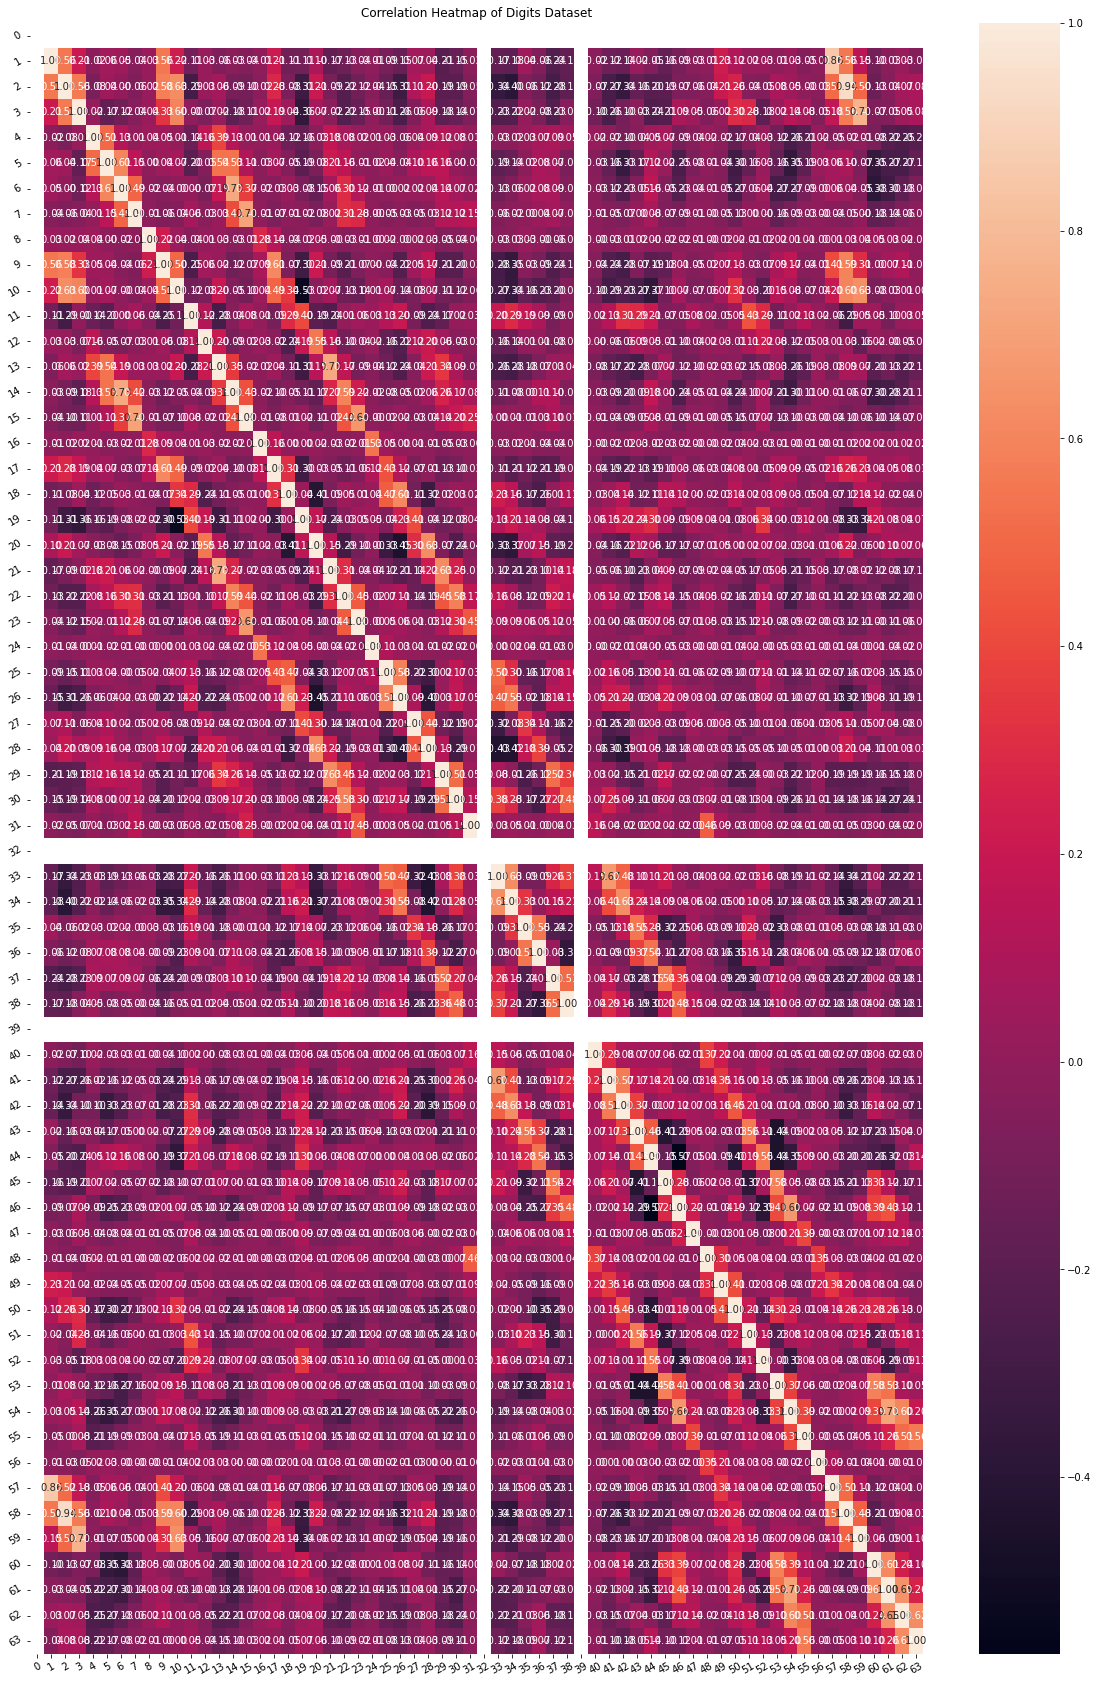

In [12]:
#Plotting correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,30))
plt.title('Correlation Heatmap of Digits Dataset')
a = sns.heatmap(corr_matrix, square=False, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show() 

In [13]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 2)Normalizing the data 

In [14]:
from sklearn.preprocessing import StandardScaler
X = digits.data
def get_normed_mean_cov(X):
    X_std = StandardScaler().fit_transform(X)
    X_mean = np.mean(X_std, axis=0)
    ## Automatic:#X_cov = np.cov(X_std.T)# Manual:
    X_cov = (X_std - X_mean).T.dot((X_std - X_mean)) / (X_std.shape[0]-1)
    return X_std, X_mean,X_cov
X_std, X_mean, X_cov = get_normed_mean_cov(X)


## 3)Calculating Eigenvalues and eigenvectors

In [15]:

eigenvals, eigenvecs = np.linalg.eig(X_cov)
print("Eigenvals shape: "+str(eigenvals.shape))
print("Eigenvecs shape: "+str(eigenvecs.shape))

Eigenvals shape: (64,)
Eigenvecs shape: (64, 64)


In [16]:
print(eigenvals)

[7.34477606 5.83549054 5.15396118 3.96623597 2.9663452  2.57204442
 2.40600941 2.06867355 1.82993314 1.78951739 1.69784616 1.57287889
 1.38870781 1.35933609 1.32152536 1.16829176 1.08368678 0.99977862
 0.97438293 0.90891242 0.82271926 0.77631014 0.71155675 0.64552365
 0.59527399 0.5765018  0.52673155 0.5106363  0.48686381 0.45560107
 0.44285155 0.42230086 0.3991063  0.39110111 0.36094517 0.34860306
 0.3195963  0.29406627 0.05037444 0.27692285 0.06328961 0.258273
 0.24783029 0.2423566  0.07635394 0.08246812 0.09018543 0.09840876
 0.10250434 0.11188655 0.11932898 0.12426371 0.13321081 0.14311427
 0.217582   0.15818474 0.16875236 0.20799593 0.17612894 0.2000909
 0.18983516 0.         0.         0.        ]


In [17]:
print(eigenvecs)

[[ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.18223392 -0.04702701  0.02358821 ...  0.          0.
   0.        ]
 [ 0.285868   -0.0595648  -0.05679875 ...  0.          0.
   0.        ]
 ...
 [ 0.103198    0.24261778 -0.02227952 ...  0.          0.
   0.        ]
 [ 0.1198106   0.16508926  0.10036559 ...  0.          0.
   0.        ]
 [ 0.07149362  0.07132924  0.09244589 ...  0.          0.
   0.        ]]


Text(0, 0.5, 'Eigenvalues')

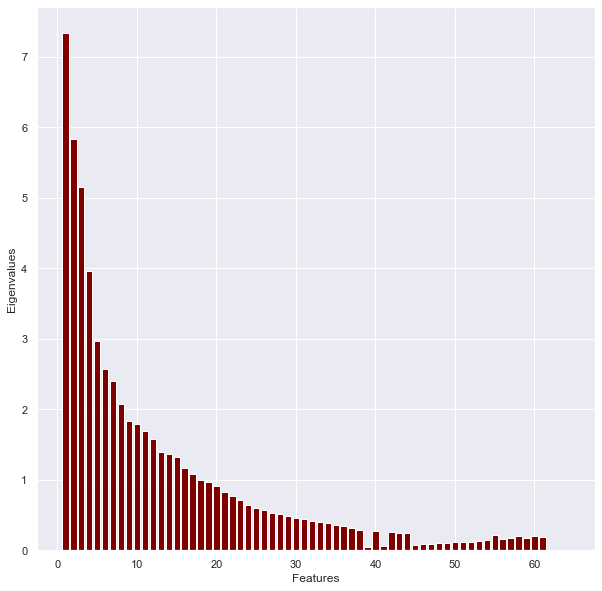

In [18]:
#Plotting Eigenvalues
num = list(range(1,65))
plt.figure(figsize=(10,10))
plt.bar(num,eigenvals,color='maroon',width=0.8)
plt.xlabel('Features')
plt.ylabel('Eigenvalues')

In [52]:
#project from 64 to 2 dimensions
pca = PCA(n_components=30)  
pca.fit(digits.data)
Z = pca.transform(digits.data)
Z.shape

(1797, 10)

# Applying Different Machine Learning Models

## Train Test Split

In [71]:
from sklearn.model_selection import train_test_split
#FLATTENING THE IMAGES
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# SplitTING data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(Z, digits.target, test_size=0.3, shuffle=False)

print('Size of Training dataset')
print(X_train.shape)

print('\nSize of Testing dataset')
print(X_test.shape)

Size of Training dataset
(1257, 10)

Size of Testing dataset
(540, 10)


# 1) SVM

In [72]:
from sklearn import datasets, svm, metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [73]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001,C=100)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)


ValueError: cannot reshape array of size 10 into shape (10,3)

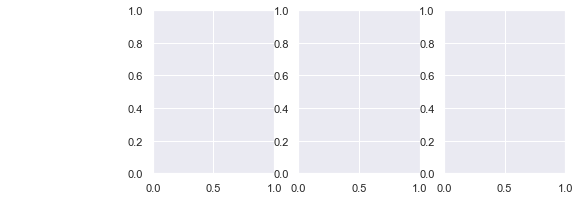

In [74]:
#ANALYZING THE PREDICTED OUTPUR AFTER APPLYING SVM
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(10,3)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [23]:
# #CALCULATING PRECISION, RECALL, F1-SCORE FOR SVM

print("\nClassification report for SVM Classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, predicted)))




Classification report for SVM Classifier SVC(C=100, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.91      0.93        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.94      0.98      0.96        52
           9       0.95      0.96      0.95        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




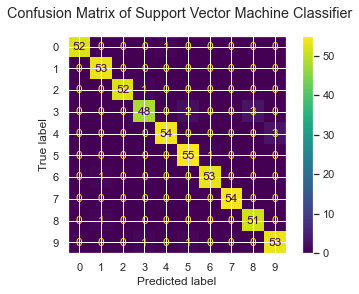

In [24]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix of Support Vector Machine Classifier\n")

plt.show()

In [25]:
print("\nAccuracy of the Support Vector Machine Classifier Algorithm: ", clf.score(X_test, y_test)*100,"%")



Accuracy of the Support Vector Machine Classifier Algorithm:  97.22222222222221 %


# 2)KNN

In [26]:
from sklearn import datasets, neighbors
from random import randint
import time
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN_classifier.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [28]:
KNN_y_pred = KNN_classifier.predict(X_test)

In [29]:
print("\nClassification report for KNN Classifier %s:\n%s\n" % (KNN_classifier, metrics.classification_report(y_test, KNN_y_pred)))



Classification report for KNN Classifier KNeighborsClassifier(metric='euclidean'):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540




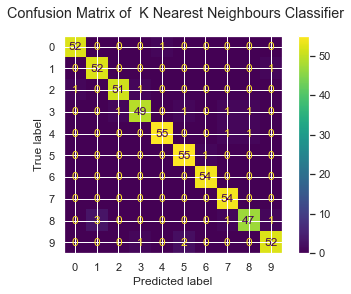

In [30]:
#Confusion Matrix
disp = metrics.plot_confusion_matrix(KNN_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix of  K Nearest Neighbours Classifier")
plt.show()

In [31]:
print("\nAccuracy of the K Nearest Neighbours Classifier Algorithm: ", KNN_classifier.score(X_test, y_test)*100,'%')



Accuracy of the K Nearest Neighbours Classifier Algorithm:  96.48148148148148 %


# 3)Gaussian Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()

#By the fit method we Fit Gaussian Naive Bayes classifier according to x and y train sets.
GNB_classifier.fit(X_train, y_train)
Out: GaussianNB()

In [33]:
GNB_y_pred = GNB_classifier.predict(X_test)

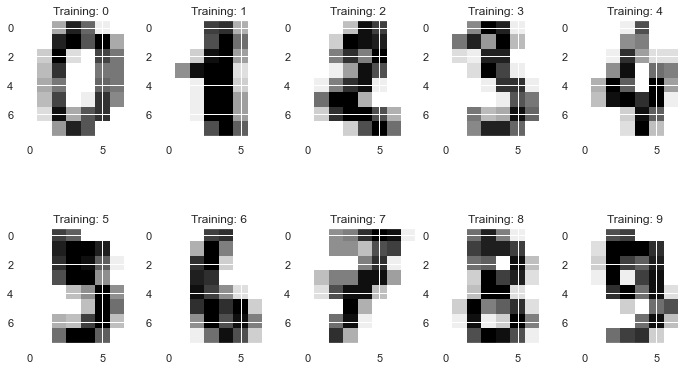

In [34]:
#Plotting the trained images
plt.figure(figsize=(12,7))
images_and_labels = list(zip(digits.images, digits.target))
for index, (images, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(images, cmap = plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

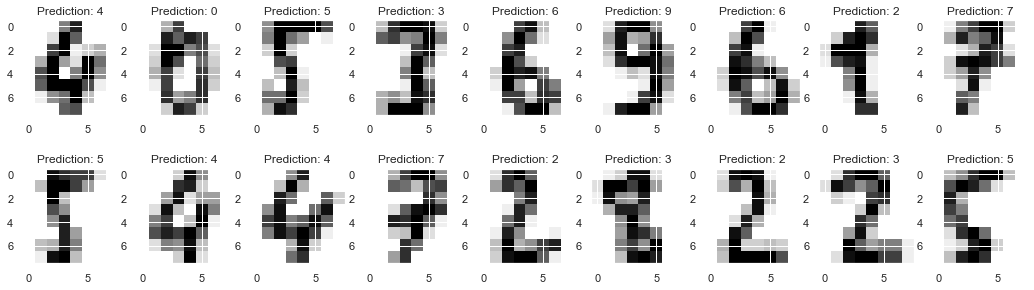

In [35]:
#Plotting the predicted Images
images_and_predictions = list(zip(X_test,GNB_y_pred))
plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(images_and_predictions[:18]):
    plt.subplot(2, 9, index + 1)
    image = image.reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

In [36]:
#DISPLAYING THE CLASSIFICATION REPORT, CONFUSION MATRIX FOR GAUSSIAN NAIVE BAYES ALGORITHM
print("\nClassification report for Gaussian Naive Bayes Classifier %s:\n%s\n" % (GNB_classifier, metrics.classification_report(y_test, GNB_y_pred)))



Classification report for Gaussian Naive Bayes Classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.65      0.79      0.71        53
           2       0.98      0.81      0.89        53
           3       0.92      0.64      0.76        53
           4       1.00      0.86      0.92        57
           5       0.83      0.93      0.87        56
           6       0.96      0.98      0.97        54
           7       0.73      0.83      0.78        54
           8       0.59      0.71      0.64        52
           9       0.82      0.73      0.77        55

    accuracy                           0.83       540
   macro avg       0.84      0.82      0.83       540
weighted avg       0.84      0.83      0.83       540




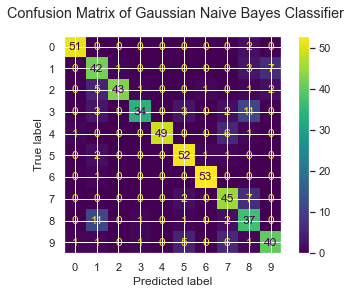

In [37]:
disp = metrics.plot_confusion_matrix(GNB_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix of Gaussian Naive Bayes Classifier")
plt.show()

In [38]:
print("\nAccuracy of the Gaussian Naive Bayes Classifier Algorithm: ", GNB_classifier.score(X_test, y_test)*100,'%')



Accuracy of the Gaussian Naive Bayes Classifier Algorithm:  82.5925925925926 %


# 4)Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


In [40]:
# training the model
logisticRegr.fit(X_train, y_train)

#Predicting the labels for new data
predictions = logisticRegr.predict(X_test)

E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
print("\nClassification report for Logistic Regression %s:\n%s\n" % (logisticRegr, metrics.classification_report(y_test, predictions)))



Classification report for Logistic Regression LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.85      0.87      0.86        53
           2       0.98      0.98      0.98        53
           3       0.92      0.83      0.87        53
           4       0.96      0.86      0.91        57
           5       0.93      0.93      0.93        56
           6       0.88      0.98      0.93        54
           7       0.96      0.94      0.95        54
           8       0.86      0.85      0.85        52
           9       0.81      0.93      0.86        55

    accuracy                           0.91       540
   macro avg       0.92      0.91      0.91       540
weighted avg       0.92      0.91      0.91       540




In [42]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print("Accuracy is: ",score*100,'%')

Accuracy is:  91.2962962962963 %


In [43]:
cm = metrics.confusion_matrix(y_test, predictions)

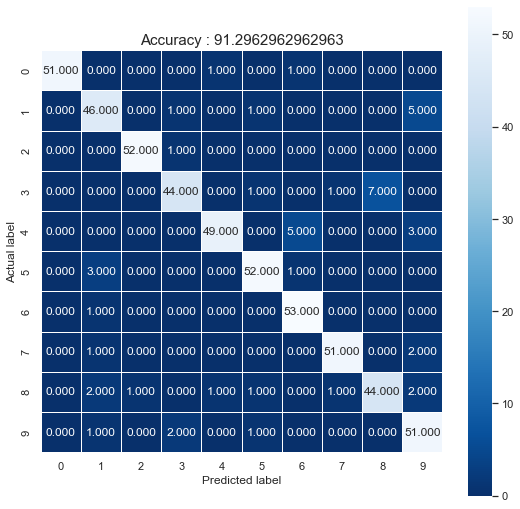

In [44]:
#Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy : {0}'.format(score*100)
plt.title(all_sample_title, size = 15);

# NEURAL NETWORK

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [46]:
mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,solver='sgd', tol=1e-4, random_state=1,learning_rate_init=.1, verbose=True)

In [47]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 2.18381432
Iteration 2, loss = 1.75805979
Iteration 3, loss = 1.35308189
Iteration 4, loss = 0.99285196
Iteration 5, loss = 0.73220817
Iteration 6, loss = 0.56906564
Iteration 7, loss = 0.44090647
Iteration 8, loss = 0.36053932
Iteration 9, loss = 0.29623007
Iteration 10, loss = 0.25189000
Iteration 11, loss = 0.22028335
Iteration 12, loss = 0.18451358
Iteration 13, loss = 0.16728753
Iteration 14, loss = 0.15040108
Iteration 15, loss = 0.13748252
Iteration 16, loss = 0.12437646
Iteration 17, loss = 0.11523989
Iteration 18, loss = 0.10551694
Iteration 19, loss = 0.09692315
Iteration 20, loss = 0.09212437
Iteration 21, loss = 0.08600578
Iteration 22, loss = 0.08272112
Iteration 23, loss = 0.07846170
Iteration 24, loss = 0.07572971
Iteration 25, loss = 0.07150961
Iteration 26, loss = 0.06877721
Iteration 27, loss = 0.06642958
Iteration 28, loss = 0.06685802
Iteration 29, loss = 0.07651436
Iteration 30, loss = 0.06416156
Iteration 31, loss = 0.05830881
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

In [48]:
predictions = mlp.predict(X_test)

In [49]:
print("\nClassification report for Neural network %s:\n%s\n" % (mlp, metrics.classification_report(y_test, predictions)))


Classification report for Neural network MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.88      0.79      0.83        53
           2       0.94      0.96      0.95        53
           3       0.92      0.85      0.88        53
           4       0.93      0.95      0.94        57
           5       0.89      0.96      0.92        56
           6       0.96      0.96      0.96        54
           7       0.96      0.93      0.94        54
           8       0.86      0.85      0.85        52
           9       0.79      0.89      0.84        55

    accuracy                           0.91       540
   macro avg       0.91      0.91      0.91       540
weighted avg       0.91      0.91      0.91       540




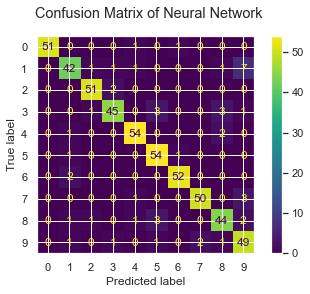

In [50]:
disp = metrics.plot_confusion_matrix(mlp, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix of Neural Network")
plt.show()

In [51]:
a=accuracy_score(y_test, predictions)
print("Accurace of neural network is",a*100,'%')

Accurace of neural network is 91.11111111111111 %


# CONCLUSION

### We have applied the following models and their accuracies came out to be as follows:

    MODEL                  ACCURACY
 1. SVM---------------------------------97.2221%
 2. KNN---------------------------------96.4814%
 3. GAUSIAN NAIVE BAYES------82.5924%
 4. LOGISTIC REGRESSION-----91.2999%
 5. NEURAL NETWORK------------91.1111%
 
### On comparing the accuracies of the above models we saw that SVM had the best accuracy followed by Logistic regression and Neural network